In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import mdirac as md

## 1. Create basic parallelogram domain

In [2]:
N1=25
K1=10

In [3]:
dr=2.*np.pi/K1 
cell=dr*np.array([[1.,0.],[-0.5,0.5*np.sqrt(3)]])
rmesh = md.Parallelogram(N1,cell)
kmesh = rmesh.reciprocal_cell()

In [4]:
### Check: exact relationship between the rmesh and kmesh cell volumes
math.isclose(rmesh.vcell*kmesh.vcell, (2*np.pi/kmesh.N1)**2, abs_tol=1.e-15)

True

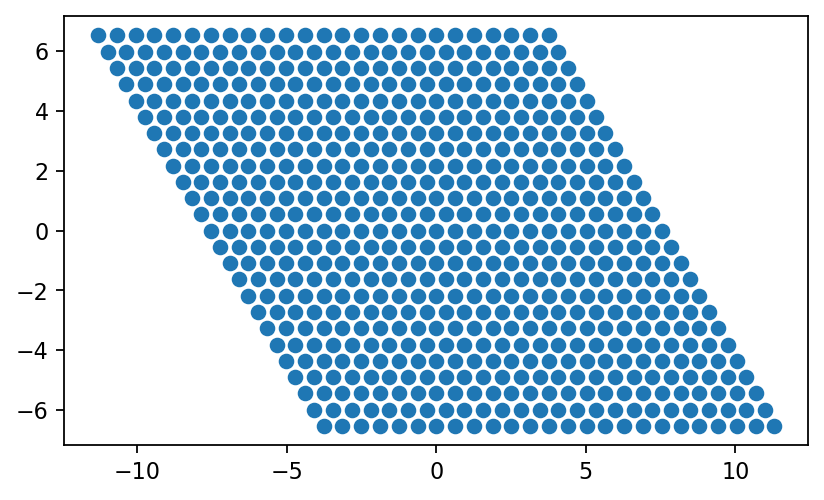

In [5]:
rmesh.show()

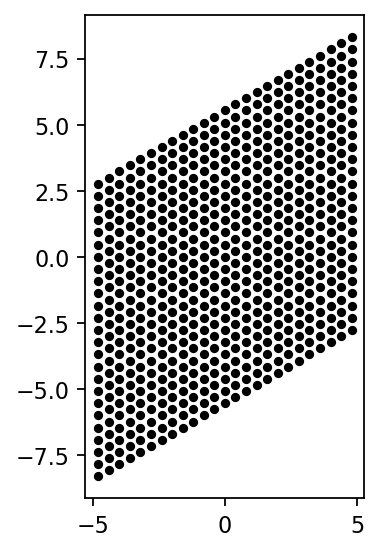

In [6]:
kmesh.show(s=10,c='k') # plot options can be specified if needed

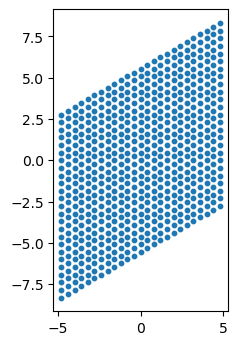

In [7]:
kmesh.show(s=10,dpi=50) # dpi can also be specified

## 2. Specify subdomain for BSE calculation

### 2.1 Circle

In [8]:
# Create circle subdomain
kmesh.circle = kmesh.get_circle()

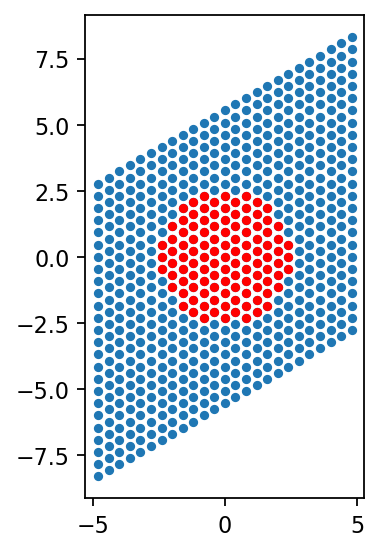

In [9]:
# By default the circle occupies 1/2 fraction of the parallelogram
# to fit all pair interactions within the basic domain.
# Subdomain is highlighted by specifying indices in the .show() method:
kmesh.show(kmesh.circle.inds,s=10) 

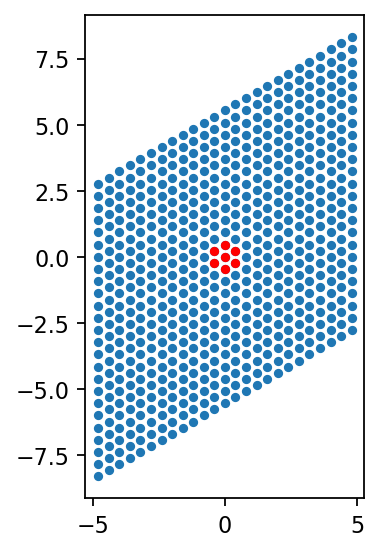

In [10]:
# A smaller fraction can be specified explicitly in the argument
kmesh.circle = kmesh.get_circle(fraction=0.1)
kmesh.show(kmesh.circle.inds,s=10) 

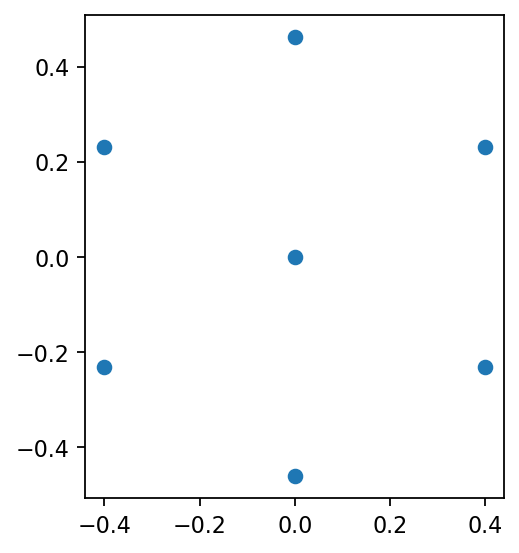

In [11]:
kmesh.circle.show() # Subdomain inherits .show() from the Domain

### 2.2 Hexagon
Hexagon subdomain is used in Toeplitz matrix BSE calculation employing the 6-fold rotational symmetry of the mesh. It enables to reduce the BSE matrix size by 36 times.

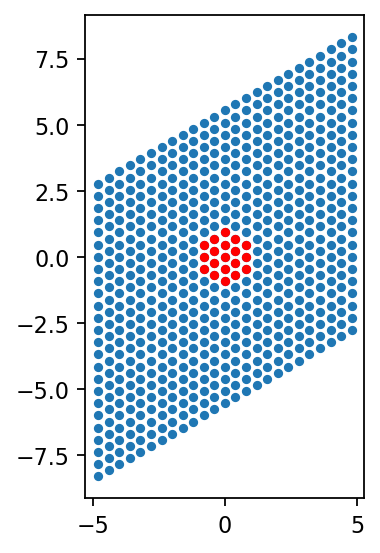

In [12]:
kmesh.hexagon = kmesh.get_hexagon(fraction=0.2)
kmesh.show(kmesh.hexagon.inds,s=10) 

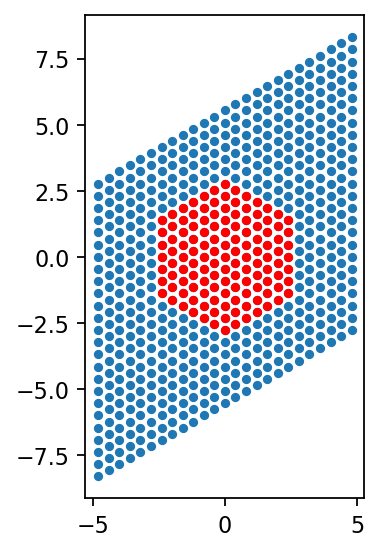

In [13]:
# The same for hexagon
kmesh.hexagon = kmesh.get_hexagon()
kmesh.show(kmesh.hexagon.inds,s=10) 

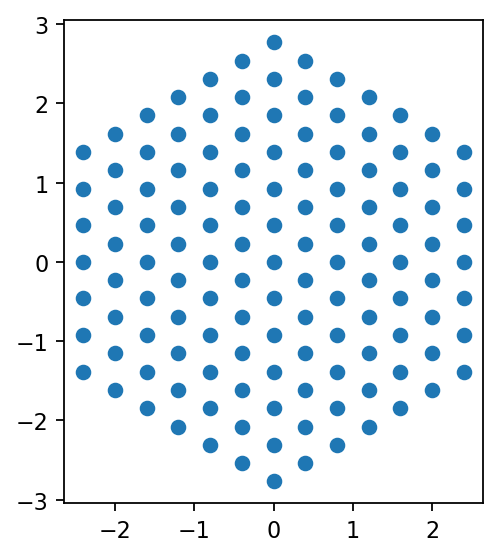

In [14]:
kmesh.hexagon.show()

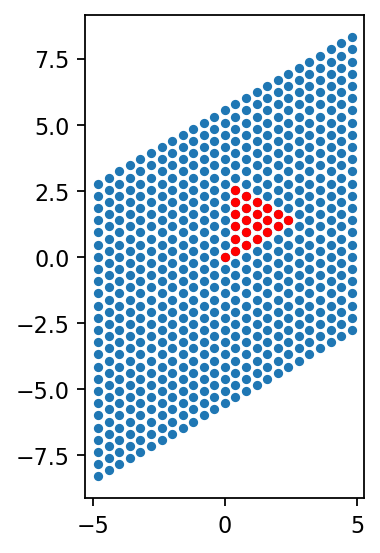

In [15]:
# Display individual hexagon sector (used in Toeplitz matrix BSE calculation)
ns=0
kmesh.show(kmesh.hexagon.s[ns].inds,s=10) 

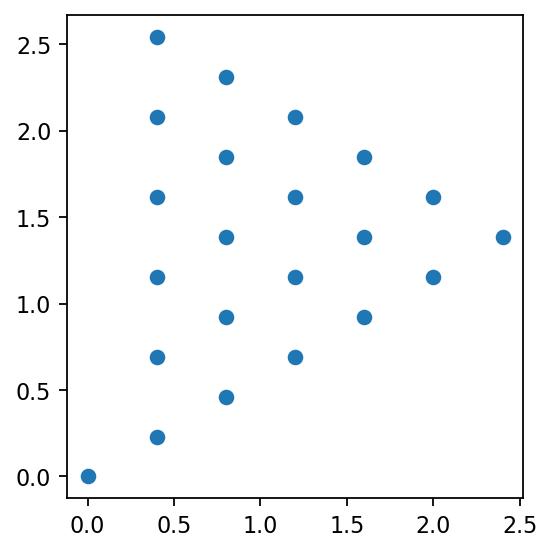

In [16]:
kmesh.hexagon.s[0].show()